In [1]:
import requests
from bs4 import BeautifulSoup
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import types

def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            try:
                yield val.__name__, val.__version__
                pass
            except:
                yield val.__name__
                pass
            pass
        pass
    pass

list(imports())

['builtins',
 'builtins',
 ('requests', '2.27.1'),
 ('re', '2.2.1'),
 'matplotlib.pyplot',
 ('pandas', '1.4.2'),
 'types']

In [48]:

def extract_reviews_counts_from_webpage(game_id):
    response = requests.get(f"https://store.steampowered.com/app/{game_id}")
    
    if response.status_code != 200:
        return "Error: Unable to access the page"

    soup = BeautifulSoup(response.text, 'html.parser')
    
    pattern = re.compile(r'\(\d+ reviews\)|No reviews|There are no reviews for this product')

    reviews = soup.find_all(string=pattern)

    if reviews:
        return reviews[0].strip()
    else:
        return "NA"

In [15]:
data_location_of_games_id='../data/raw_data/'
with open(data_location_of_games_id+"games_list_to_rescrape.txt", 'r') as f:
    games_with_no_reviews = f.read().splitlines()

In [16]:
list_of_reviews_counts=[extract_reviews_counts_from_webpage(str(i)) for i in tqdm(games_with_no_reviews)]

100%|███████████████████████████████████████| 1378/1378 [13:22<00:00,  1.72it/s]


In [18]:
# cleaning the outputs
characters_to_remove = ['(', ')', ',']
list_of_reviews_counts_cleaned = [element.translate({ord(char): None for char in characters_to_remove}) for element in tqdm(list_of_reviews_counts)]

100%|███████████████████████████████████| 1378/1378 [00:00<00:00, 213180.54it/s]


In [39]:
# Function to extract number from a string or return 0 for specific text
def extract_number(s):
    if s == "There are no reviews for this product":
        return 0
    match = re.search(r'\d+', s)
    return int(match.group()) if match else None

# Convert elements to numbers
list_of_reviews_counts_cleaned = [extract_number(element) for element in list_of_reviews_counts_cleaned]


In [52]:
# saving data
data_location_supplemental_data="../data/supplemental_data/information on games with zero reviews returned by API"
df=pd.DataFrame({"Game id":single_FPS_appids,"Number of reviews":list_of_reviews_counts_cleaned})
df.to_csv(f"{data_location_supplemental_data}games_with_no_reviews.csv")

In [4]:
data_location_supplemental_data="../data/supplemental_data/information on games with zero reviews returned by API/"
df=pd.read_csv(f"{data_location_supplemental_data}games_with_no_reviews.csv")

In [14]:
len(df)

1378

In [16]:
df["Number of reviews"].value_counts()

0.0      944
1.0       55
2.0       20
3.0       13
10.0       9
        ... 
433.0      1
181.0      1
115.0      1
137.0      1
378.0      1
Name: Number of reviews, Length: 138, dtype: int64

In [18]:
df[df["Number of reviews"].isna()]

,Unnamed: 0,Game id,Number of reviews
0,0,1000900,NaN
6,6,1045150,NaN
23,23,1122870,NaN
26,26,1134530,NaN
70,70,1287150,NaN
...,...,...,...
1341,1341,802200,NaN
1345,1345,814550,NaN
1362,1362,920450,NaN
1365,1365,928950,NaN


In [13]:
df[df["Number of reviews"]>=100]

,Unnamed: 0,Game id,Number of reviews
24,24,1122970,137.0
27,27,1137910,167.0
35,35,1172830,135.0
37,37,1180380,674.0
44,44,1201400,757.0
...,...,...,...
1339,1339,783770,167.0
1355,1355,890880,504.0
1363,1363,920470,189.0
1367,1367,947940,695.0


In [25]:
df[(df["Number of reviews"]<100)& (df["Number of reviews"]>=1)]
# 63+67+944+304

,Unnamed: 0,Game id,Number of reviews
5,5,1044820,1.0
7,7,1057700,39.0
8,8,1069380,38.0
13,13,1089130,32.0
18,18,1118920,22.0
...,...,...,...
1352,1352,882860,1.0
1353,1353,886220,10.0
1358,1358,905640,12.0
1364,1364,922320,17.0


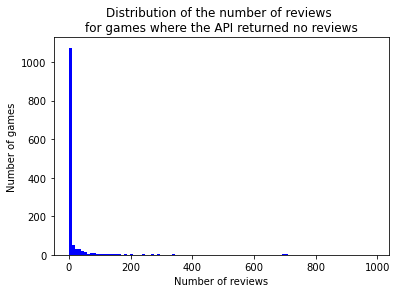

In [45]:
# plotting the distribution
list_without_na = [element for element in list_of_reviews_counts_cleaned if element != None]
plt.hist(list_without_na, bins=100, color="blue")
plt.title('Distribution of the number of reviews \nfor games where the API returned no reviews')
plt.xlabel('Number of reviews')
plt.ylabel('Number of games')

# Save the figure before showing it
plt.savefig(f'{data_location_supplemental_data}distribution_plot.jpg', dpi=300)

# Show the plot
plt.show()